In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images to a 1D array
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit) and softmax activation
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2637 - accuracy: 0.9238 - val_loss: 0.1406 - val_accuracy: 0.9583
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1185 - accuracy: 0.9649 - val_loss: 0.1059 - val_accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0813 - accuracy: 0.9754 - val_loss: 0.0867 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.0788 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0759 - val_accuracy: 0.9755


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0759 - accuracy: 0.9755
Test accuracy: 0.9754999876022339


In [8]:
# Save the model
model.save("mnist_model.h5")

# Loading The Saved Model 

In [21]:
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [11]:
# Load the saved model
loaded_model = load_model("mnist_model.h5")

In [12]:
# Function to predict on new images
def predict_on_image(model, image_path):
    # Load and preprocess the image
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.expand_dims(input_arr, axis=0)
    input_arr = input_arr / 255.0  # Normalize pixel values
    
    # Make prediction
    prediction = model.predict(input_arr)
    predicted_class = np.argmax(prediction)
    
    return predicted_class

1/1 [==============================] - 0s 17ms/step
Predicted class: 7


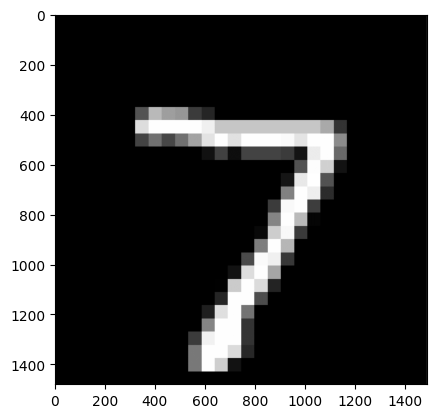

In [23]:
# Example usage: Predicting on a new image
image_path = "sample_image.png"  # Path to your image
img = np.asarray(Image.open(image_path))
plt.imshow(img)
predicted_class = predict_on_image(loaded_model, image_path)
print("Predicted class:", predicted_class)